In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_train_data.csv", filename="intent_train_data.csv")
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_test_data.csv", filename="intent_test_data.csv")

train_data = pd.read_csv('intent_train_data.csv')
test_data = pd.read_csv('intent_test_data.csv')


In [39]:
train_data

,intent,label
0,add another song to the cita rom ntica playlist,AddToPlaylist
1,add clem burke in my playlist pre party r b jams,AddToPlaylist
2,add live from aragon ballroom to trapeo,AddToPlaylist
3,add unite and win to my night out,AddToPlaylist
4,add track to my digster future hits,AddToPlaylist
...,...,...
11779,can a i get the movie schedule for sympathy fo...,SearchScreeningEvent
11780,find movie schedules for animated movies aroun...,SearchScreeningEvent
11781,what time is bordertown trail showing,SearchScreeningEvent
11782,in the neighbourhood find movies with movie times,SearchScreeningEvent


In [40]:
intent_train = train_data['intent'].tolist()
label_train = train_data['label'].tolist()
intent_test = test_data['intent'].tolist()
label_test = test_data['label'].tolist()

print('훈련용 문장의 수 :', len(intent_train))
print('훈련용 레이블의 수 :', len(label_train))
print('테스트용 문장의 수 :', len(intent_test))
print('테스트용 레이블의 수 :', len(label_test))


훈련용 문장의 수 : 11784
훈련용 레이블의 수 : 11784
테스트용 문장의 수 : 600
테스트용 레이블의 수 : 600


<AxesSubplot:>

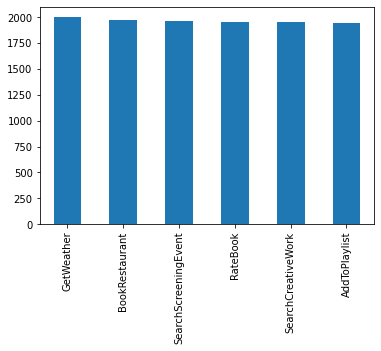

In [41]:
train_data.label.value_counts().plot(kind='bar')

In [42]:
# 레이블 인코딩, 레이블에 고유한 정수를 부여
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(label_train)

# 고유 정수로 변환
label_train = idx_encode.transform(label_train)
label_test = idx_encode.transform(label_test)

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print("레이블, 정수 맵핑 : ", label_idx)

레이블, 정수 맵핑 :  {'AddToPlaylist': 0, 'BookRestaurant': 1, 'GetWeather': 2, 'RateBook': 3, 'SearchCreativeWork': 4, 'SearchScreeningEvent': 5}


In [43]:
print(list(idx_encode.classes_))
print(idx_encode.transform(list(idx_encode.classes_)))

['AddToPlaylist', 'BookRestaurant', 'GetWeather', 'RateBook', 'SearchCreativeWork', 'SearchScreeningEvent']
[0 1 2 3 4 5]


In [44]:
# 토크나이징
tokenizer = Tokenizer()
tokenizer.fit_on_texts(intent_train)
sequences = tokenizer.texts_to_sequences(intent_train)
sequences[:4]

[[11, 191, 61, 4, 1, 4013, 1141, 1572, 15],
 [11, 2624, 1573, 3, 14, 15, 939, 82, 256, 188, 548],
 [11, 187, 42, 2625, 4014, 4, 1968],
 [11, 2626, 22, 2627, 4, 14, 192, 27]]

In [45]:
word_index = tokenizer.word_index
vocab_size = len(word_index)+1
print(vocab_size)

9870


문장 최대 길이 : 35
문장 평균 길이 : 9.364392396469789


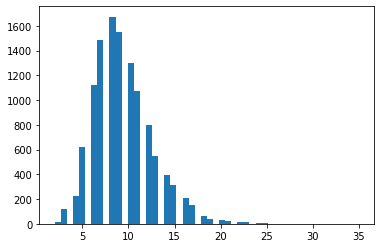

In [46]:
print("문장 최대 길이 :", max(len(l) for l in sequences))
print("문장 평균 길이 :", sum(map(len, sequences))/len(sequences))
plt.hist([len(s) for s in sequences], bins=50)
plt.show()

In [47]:
max_len = 35

intent_train = pad_sequences(sequences, maxlen=max_len)
label_train = to_categorical(np.asarray(label_train))

indices = np.arange(intent_train.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 만들기 완료')

intent_train = intent_train[indices]
label_train = label_train[indices]

# 검증 데이터 셋팅
n_of_val = int(0.1* intent_train.shape[0])

# 분리
X_train = intent_train[:-n_of_val]
y_train = label_train[:-n_of_val]
X_val = intent_train[-n_of_val:]
y_val = label_train[-n_of_val:]
X_test = intent_test
y_test = label_test


랜덤 시퀀스 만들기 완료


In [50]:
print('훈련 데이터의 크기(shape):', X_train.shape)
print('검증 데이터의 크기(shape):', X_val.shape)
print('훈련 데이터 레이블의 크기(shape):', y_train.shape)
print('검증 데이터 레이블의 크기(shape):', y_val.shape)
print('테스트 데이터의 개수 :', len(X_test))
print('테스트 데이터 레이블의 개수 :', len(y_test))

훈련 데이터의 크기(shape): (10606, 35)
검증 데이터의 크기(shape): (1178, 35)
훈련 데이터 레이블의 크기(shape): (10606, 6)
검증 데이터 레이블의 크기(shape): (1178, 6)
테스트 데이터의 개수 : 600
테스트 데이터 레이블의 개수 : 600


사전 훈련된 GloVe 임베딩 사용하기

In [23]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-08-01 21:04:14--  http://nlp.stanford.edu/data/glove.6B.zip
nlp.stanford.edu (nlp.stanford.edu) 해석 중... 171.64.67.140
다음으로 연결 중: nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 302 Found
위치: https://nlp.stanford.edu/data/glove.6B.zip [따라감]
--2022-08-01 21:04:14--  https://nlp.stanford.edu/data/glove.6B.zip
다음으로 연결 중: nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [따라감]
--2022-08-01 21:04:15--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
downloads.cs.stanford.edu (downloads.cs.stanford.edu) 해석 중... 171.64.64.22
다음으로 연결 중: downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 862182613 (822M) [application/zip]
저장 위치: `glove.6B.zip'

glove.6B.zip        100%[===================>] 822.24M  5.11MB/s    /  2m 57s  

2022-08-01 21:07

glove data 구조
- the [0.123, 0.2183912, 0.1234] .....

In [51]:
embedding_dict = dict()
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')
for line in f :
    word_vector = line.split()
    word = word_vector[0] # 단어
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array(벡터값) 로 변환
    embedding_dict[word] = word_vector_arr
f.close()
print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [52]:
print("임베딩 차원 :", len(embedding_dict['no']))

임베딩 차원 : 100


In [53]:
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
print("임베딩 테이블 크기 : ", np.shape(embedding_matrix))

임베딩 테이블 크기 :  (9870, 100)


In [54]:
#훈련 데이터에 있는 단어와 사전 훈련된 워드 임베딩 벡터의 값을 맵핑하여 임베딩 테이블에 저장합니다.

for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [55]:

print('임베딩 테이블의 크기(shape) :',np.shape(embedding_matrix))

임베딩 테이블의 크기(shape) : (9870, 100)


In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate

kernel_sizes = [2, 3, 5]
num_filters = 512
dropout_ratio = 0.5

model_input = Input(shape=(max_len,))
output = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                      input_length=max_len, trainable=False)(model_input)

conv_blocks = []

for size in kernel_sizes:
    conv = Conv1D(filters=num_filters,
                         kernel_size=size,
                         padding="valid",
                         activation="relu",
                         strides=1)(output)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

output = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
output = Dropout(dropout_ratio)(output)
model_output = Dense(len(label_idx), activation='softmax')(output)
model = Model(model_input, model_output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 35, 100)      987000      ['input_2[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 34, 512)      102912      ['embedding_1[0][0]']            
                                                                                                  
 conv1d_4 (Conv1D)              (None, 33, 512)      154112      ['embedding_1[0][0]']            
                                                                                            

In [58]:
history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data=(X_val, y_val))

Epoch 1/10
  1/166 [..............................] - ETA: 1:00 - loss: 2.0486 - acc: 0.1562

2022-08-01 21:22:06.627802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


166/166 [==============================] - 3s 13ms/step - loss: 0.1838 - acc: 0.9448 - val_loss: 0.0638 - val_acc: 0.9813


2022-08-01 21:22:08.796729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/10
166/166 [==============================] - 2s 12ms/step - loss: 0.0434 - acc: 0.9871 - val_loss: 0.0486 - val_acc: 0.9864
Epoch 3/10
166/166 [==============================] - 2s 12ms/step - loss: 0.0280 - acc: 0.9912 - val_loss: 0.0563 - val_acc: 0.9796
Epoch 4/10
166/166 [==============================] - 2s 12ms/step - loss: 0.0169 - acc: 0.9955 - val_loss: 0.0437 - val_acc: 0.9864
Epoch 5/10
166/166 [==============================] - 2s 12ms/step - loss: 0.0126 - acc: 0.9961 - val_loss: 0.0441 - val_acc: 0.9864
Epoch 6/10
166/166 [==============================] - 2s 12ms/step - loss: 0.0088 - acc: 0.9979 - val_loss: 0.0399 - val_acc: 0.9856
Epoch 7/10
166/166 [==============================] - 2s 12ms/step - loss: 0.0066 - acc: 0.9981 - val_loss: 0.0419 - val_acc: 0.9881
Epoch 8/10
166/166 [==============================] - 2s 12ms/step - loss: 0.0041 - acc: 0.9991 - val_loss: 0.0505 - val_acc: 0.9864
Epoch 9/10
166/166 [==============================] - 2s 12ms/step - 

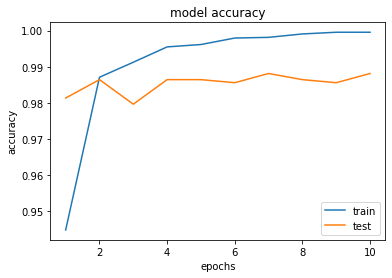

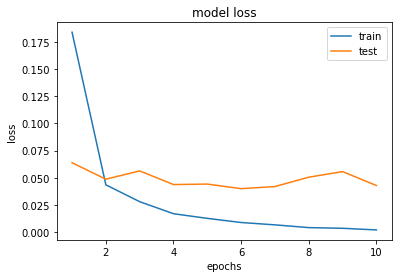

In [59]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [60]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len)

y_predicted = model.predict(X_test)
y_predicted = y_predicted.argmax(axis=-1) # 예측을 정수 시퀀스로 변환

2022-08-01 21:22:56.477650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [61]:
print('정확도(Accuracy) : ', sum(y_predicted == y_test) / len(y_test))

정확도(Accuracy) :  0.9916666666666667
